# **DL model to to distinguish between CATS and DOGS**

###  

## importing required libraries

In [158]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow import keras

%matplotlib inline

######  

#### reading one sample image from our dataset

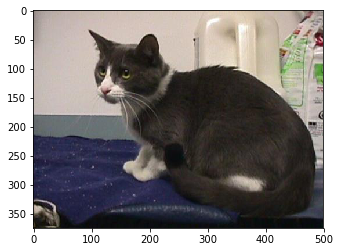

In [154]:
cat = cv2.imread('CATS_DOGS/train/CAT/4.jpg')
cat = cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)
plt.imshow(cat)

In [155]:
dog = cv2.imread('CATS_DOGS/train/DOG/2.jpg')
dog = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)

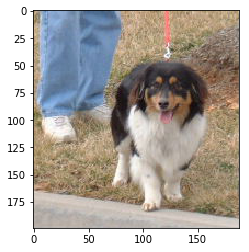

In [19]:
plt.imshow(dog)

## Image-preprocessing

######        

#### applying mild variations on each image to make our model more generalized on cat and dog images

#### variations include like rotation, changing width, height, zooming in and out, fliping image etc.

######   

In [20]:
from keras.preprocessing.image import ImageDataGenerator

In [21]:
image_gen = ImageDataGenerator(rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rescale=1/255,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               fill_mode='nearest')

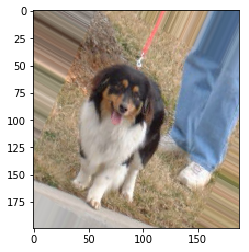

In [22]:
plt.imshow(image_gen.random_transform(dog))

In [23]:
# image_gen.flow_from_directory('CATS_DOGS/CATS_DOGS/train')

In [24]:
input_shape = (150,150,3)

######  

## Building CNN architecture

In [28]:
from tensorflow.keras.models import Sequential

In [29]:
from tensorflow.keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [30]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
              metrics = ['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0

######  

## Creating train/test set for training

In [32]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('CATS_DOGS/train',
                                                target_size=input_shape[:2],
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 18743 images belonging to 2 classes.


In [33]:
batch_size = 16

test_image_gen = image_gen.flow_from_directory('CATS_DOGS/test',
                                                target_size=input_shape[:2],
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 6251 images belonging to 2 classes.


In [34]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

######  

## Training model

In [105]:
import warnings
warnings.filterwarnings('ignore')

results = model.fit_generator(train_image_gen,epochs=50,steps_per_epoch=100,
                              validation_data=test_image_gen,validation_steps=12)

Epoch 1/50
100/100 [==============================] - 57s 569ms/step - loss: 0.6789 - accuracy: 0.5675 - val_loss: 0.6575 - val_accuracy: 0.6354
Epoch 2/50
100/100 [==============================] - 56s 563ms/step - loss: 0.6807 - accuracy: 0.5763 - val_loss: 0.6544 - val_accuracy: 0.5677
Epoch 3/50
100/100 [==============================] - 56s 561ms/step - loss: 0.6745 - accuracy: 0.5913 - val_loss: 0.6505 - val_accuracy: 0.6615
Epoch 4/50
100/100 [==============================] - 56s 562ms/step - loss: 0.6722 - accuracy: 0.5881 - val_loss: 0.6622 - val_accuracy: 0.5885
Epoch 5/50
100/100 [==============================] - 57s 566ms/step - loss: 0.6556 - accuracy: 0.5975 - val_loss: 0.7138 - val_accuracy: 0.5625
Epoch 6/50
100/100 [==============================] - 57s 574ms/step - loss: 0.6600 - accuracy: 0.6306 - val_loss: 0.6345 - val_accuracy: 0.6615
Epoch 7/50
100/100 [==============================] - 57s 574ms/step - loss: 0.6596 - accuracy: 0.6131 - val_loss: 0.6073 - val_ac

In [164]:
# model.save('50_epochs_cats_dogs_classifier.h5')      

# to save your trained model use the above command, and your model will be saved to the same location where your jupyter notebook is saved

In [162]:
# load_model = keras.models.load_model('50_epochs_cats_dogs_classifier.h5')

#  use this command to load previously saved model
#  add complete file path if the model is saved in some other file

##  

## Results

In [106]:
results.history['accuracy']

[0.5674999952316284,
 0.5762500166893005,
 0.5912500023841858,
 0.5881249904632568,
 0.5975000262260437,
 0.6306250095367432,
 0.6131250262260437,
 0.6112499833106995,
 0.6243749856948853,
 0.6131250262260437,
 0.6456249952316284,
 0.659375011920929,
 0.6412500143051147,
 0.6731250286102295,
 0.6737499833106995,
 0.6706249713897705,
 0.6681332588195801,
 0.6825000047683716,
 0.6943749785423279,
 0.684374988079071,
 0.6981250047683716,
 0.6924999952316284,
 0.706250011920929,
 0.6931250095367432,
 0.7006250023841858,
 0.7106249928474426,
 0.7043750286102295,
 0.7131249904632568,
 0.721875011920929,
 0.7281249761581421,
 0.7131249904632568,
 0.7268750071525574,
 0.7174999713897705,
 0.7337499856948853,
 0.7250000238418579,
 0.7262499928474426,
 0.7256249785423279,
 0.7356250286102295,
 0.7381250262260437,
 0.7406250238418579,
 0.7303582429885864,
 0.7556250095367432,
 0.7418749928474426,
 0.7462499737739563,
 0.7450000047683716,
 0.7568749785423279,
 0.7718750238418579,
 0.75187498331069

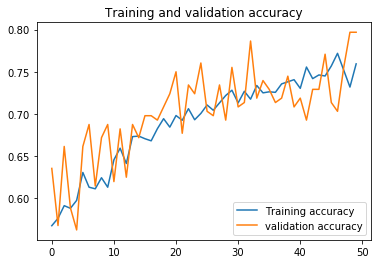

<Figure size 432x288 with 0 Axes>

In [146]:
plt.plot(results.history['accuracy'], label='Training accuracy')
plt.plot(results.history['val_accuracy'],label='validation accuracy')

plt.title('Training and validation accuracy')
plt.legend(loc=4)
                                                                        #         Location String   Location Code
                                                                        #         ===============   =============
                                                                        #         'best'            0
                                                                        #         'upper right'     1
                                                                        #         'upper left'      2
                                                                        #         'lower left'      3
                                                                        #         'lower right'     4
                                                                        #         'right'           5
                                                                        #         'center left'     6
                                                                        #         'center right'    7
                                                                        #         'lower center'    8
                                                                        #         'upper center'    9
                                                                        #         'center'          10


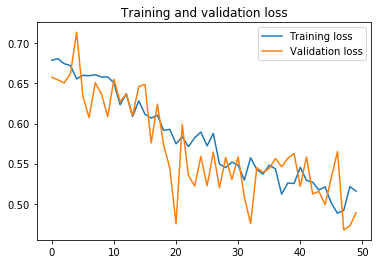

In [148]:
plt.plot(results.history['loss'], label='Training loss')
plt.plot(results.history['val_loss'], label='Validation loss')

plt.title('Training and validation loss')
plt.legend(loc=0)

In [165]:
# If you train for 100 epochs then the accuracy will reach upto 85% 
# (it may take 1-1.5 hours depending upon your system's computational power)

## Testing our model on a new image

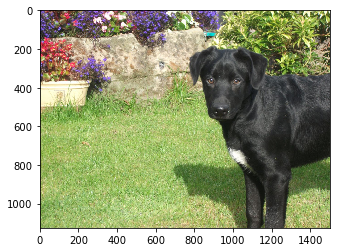

In [149]:
dog = cv2.imread('dog.jpg')
dog = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)
plt.imshow(dog)


In [150]:
#  we have to resize our image to (150,150) with 3 color channels as our model is trained for this image size
dog_resized = cv2.resize(dog, (150,150))

# we have to add 4th dimension to our image as as model accepts inputs with 4 dimension
dog_img = np.expand_dims(dog_resized,axis = 0)

# (1, 150, 150, 3) is the final shape of the image
#  here the extra dimension signifiees that there is only 1 image as input

# normalizing the pixel values between [0, 1]
dog_img = dog_img/255


In [151]:
model.predict_classes(dog_img)

#  0 - cat
#  1 - dog

array([[1]])

In [152]:
model.predict(dog_img)
#  the output is accuracy/100 
#  (so here for example   "array([[0.97528625]], dtype=float32)"   means 97.528625 % accuracy

array([[0.97528625]], dtype=float32)